In [1]:
import sys
!{sys.executable} -m pip uninstall splinter
!{sys.executable} -m pip install splinter==0.18
!{sys.executable} -m pip install selenium

^C


In [2]:
# Import Splinter, BeautifulSoup, Matplotlib, and Pandas
from splinter import Browser
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
import pandas as pd
from webdriver_manager.chrome import ChromeDriverManager

In [3]:
# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [4]:
# Visit the Mars news site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [5]:
# Read HTML table into a DataFrame
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
mars_df = df[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [6]:
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [7]:
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [8]:
# How many months exist on Mars?
len(mars_df['month'].unique())

12

In [9]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?
len(mars_df['sol'].unique())

1867

In [10]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)?
mars_temp = mars_df.groupby('month')['min_temp'].mean()
mars_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

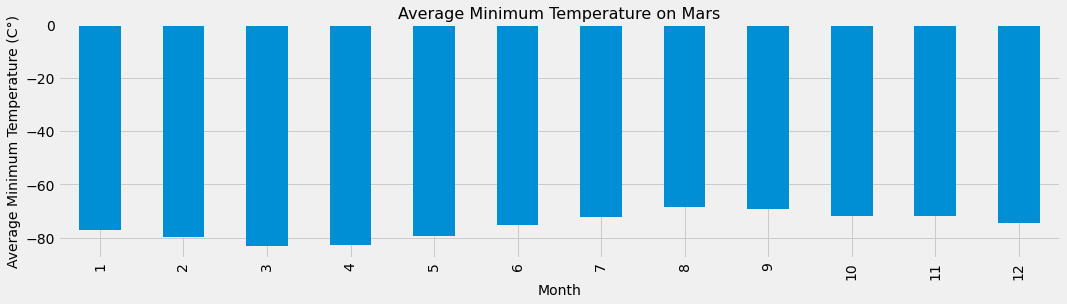

On average, month 3 is the coldest and month 8 is the warmest.


In [11]:
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

mars_temp.plot.bar(figsize = (16, 4)) 

# Create labels for the X axis, Y axis, and title
plt.xlabel("Month", fontsize = 14)
plt.ylabel("Average Minimum Temperature (C°)", fontsize = 14)
plt.title("Average Minimum Temperature on Mars", fontsize = 16)
plt.show()
print ("On average, month 3 is the coldest and month 8 is the warmest.")

In [12]:
# Which months have the lowest and the highest atmospheric pressure on Mars? 
mars_pres = mars_df.groupby('month')['pressure'].mean()
mars_pres

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

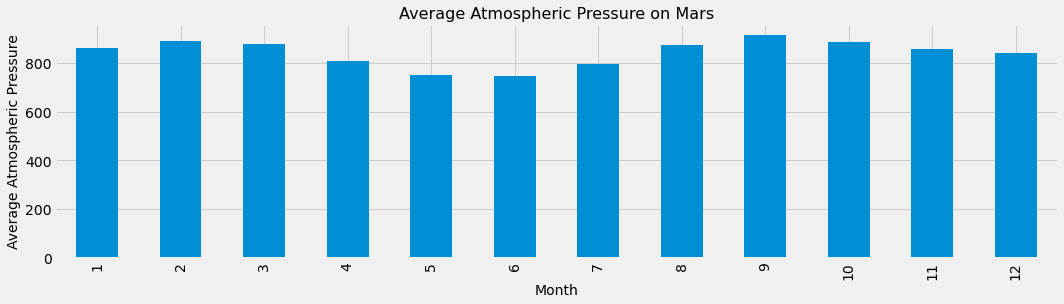

On average, month 9 has the highest atmospheric pressure and month 6 has the lowest.


In [13]:
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

mars_pres.plot.bar(figsize = (16, 4)) 

# Create labels for the X axis, Y axis, and title 
plt.xlabel("Month", fontsize = 14)
plt.ylabel("Average Atmospheric Pressure", fontsize = 14)
plt.title("Average Atmospheric Pressure on Mars", fontsize = 16)
plt.show()
print ("On average, month 9 has the highest atmospheric pressure and month 6 has the lowest.")


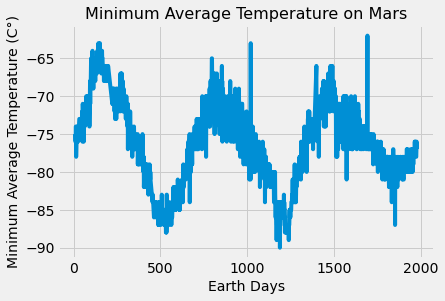

Based on the cyclical lowest minimum temperature indicating it is winter, there are around 600 Earth days in a Martian year.


In [14]:
# About how many terrestrial (Earth) days exist in a Martian year? 
# That is, in the time that Mars circles the Sun once, how many days elapse on Earth?
x = mars_df['sol'] 
y = mars_df['min_temp']

plt.plot(x,y) 

# Create labels for the X axis, Y axis, and title 
plt.xlabel("Earth Days", fontsize = 14)
plt.ylabel("Minimum Average Temperature (C°)", fontsize = 14)
plt.title("Minimum Average Temperature on Mars", fontsize = 16)
plt.show()
print ("Based on the cyclical lowest minimum temperature indicating it is winter, there are around 600 Earth days in a Martian year.")

In [15]:
# Export the DataFrame to a CSV file
mars_df.to_csv('mars_data.csv')

In [16]:
browser.quit()